In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [11]:
np_df = pd.read_csv('data/national_park_species - national_park_species.csv')
np_df.head()

/Users/jpcohen/MEDS/eds_232/eds-232-discussion/data/national_park_species - national_park_species.csv

,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",True,False,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",True,False,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


In [13]:
for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Abundance', 'Observations']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes

In [14]:
np_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Abundance_cat',
       'Observations_cat'],
      dtype='object')

## Split and scale data

In [91]:
# declare variables
X = np_df[['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat', 
           'Sensitive_cat', 'Nativeness_cat', 'Abundance_cat',
           'Observations_cat']]
y = np_df['ParkName_cat']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

# standardize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# initialize KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [97]:
# print accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6037303664921466

In [98]:
def knn():
    
    k_values = [3,5,7,9,11]
    accuracies = []
    
    # iterate over values of k, run a KMM, and get accuracy
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"K = {k} - Accuracy: {accuracy:.3f}")
    plt.figure(figsize = (10,6))
    plt.plot(k_values, accuracies, marker = 'o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.title('KNN: Accuracy vs K')
    plt.show()

K = 3 - Accuracy: 0.597
K = 5 - Accuracy: 0.604
K = 7 - Accuracy: 0.602
K = 9 - Accuracy: 0.601
K = 11 - Accuracy: 0.598


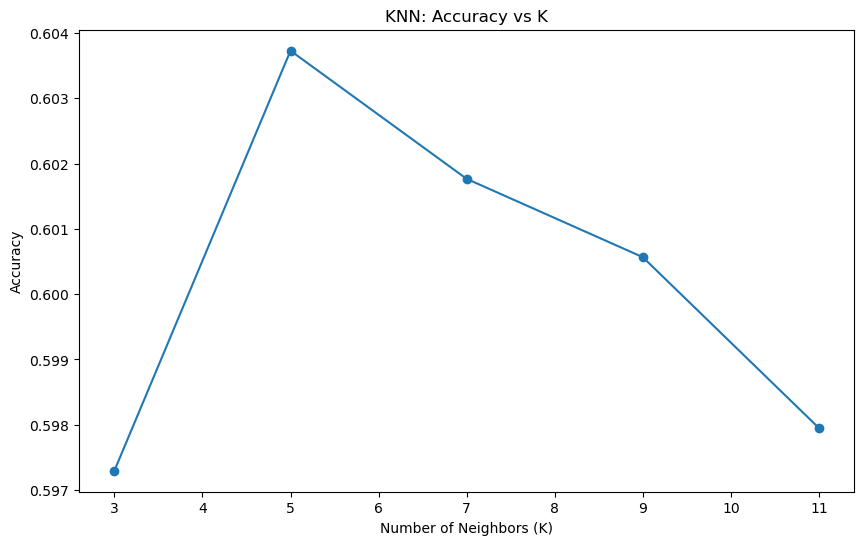

In [99]:
knn()

## Decision tree model

In [55]:
# init decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

In [56]:
# Calculate accuracies
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6369982547993019

## tune model

In [65]:
# we are updating how many branches we can have on our tree

def decision_tree():
    
    max_depths = [2,3,4,5]
    accuracies = []
    
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth = depth)
        dt.fit(X_train_scaled, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Max Depth: {depth} - Accuracy: {accuracy:.3f}")

In [66]:
decision_tree()

Max Depth: 2 - Accuracy: 0.464
Max Depth: 3 - Accuracy: 0.497
Max Depth: 4 - Accuracy: 0.532
Max Depth: 5 - Accuracy: 0.547


# visualize model

In [82]:
# visualize the best performing tree

dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_scaled, y_train)

# create the naooubg fom numeric classes to descruptive names
class_mapping = dict(zip(dt_best.classes_, np_df.ParkName.unique()))

# convert class labels in dt.classes_to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot decision tree
plt.figure(figsize = (12, 15), dpi = 700)
plot_tree(dt_best, feature_names = X.columns, class_names = class_names_str, 
         filled = True)
plt.title('Decision Tree with max depth of 5')
plt.savefig('figs/lab_4.png')
plt.show()

In [83]:
# look more closely at node values
dt_best.tree_.value[1]

array([[1167.,  905., 1354., 1733., 1868., 1402., 3386., 1144., 1717.,
        1605., 1382., 1784., 1945., 1431., 1238.]])

## Find important features

In [84]:
dt_best.feature_importances_

array([1.33257913e-01, 9.90603110e-03, 1.51981334e-04, 1.43258643e-03,
       0.00000000e+00, 7.05744354e-01, 5.71038184e-02, 9.24033152e-02])